# Real Estate Price Prediction   
<h3>Achille Nguessie</h3>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
data = fetch_california_housing(as_frame=True)
feature_names = data.feature_names
target_name = data.target_names
X, y = data.data, data.target

# 3. No Outliers

### Removing outliers

--------MedInc--------
Lower Whisker: 0.4999
Upper Whisker: 8.0113



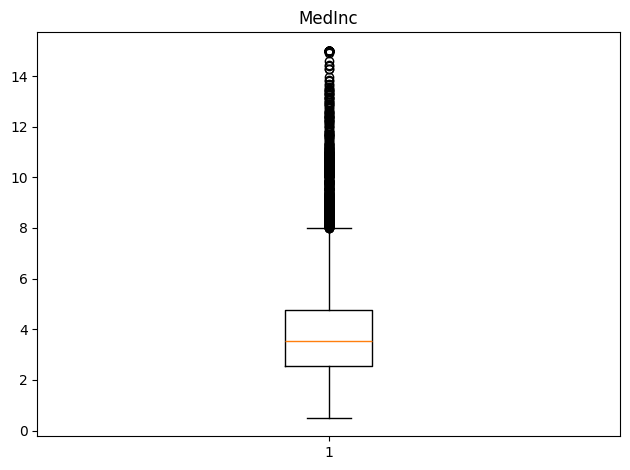

--------HouseAge--------
Lower Whisker: 1.0
Upper Whisker: 52.0



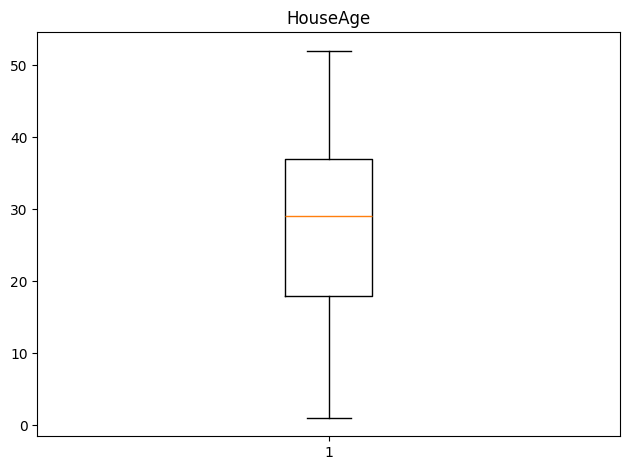

--------AveRooms--------
Lower Whisker: 2.0327380952380953
Upper Whisker: 8.469738030713641



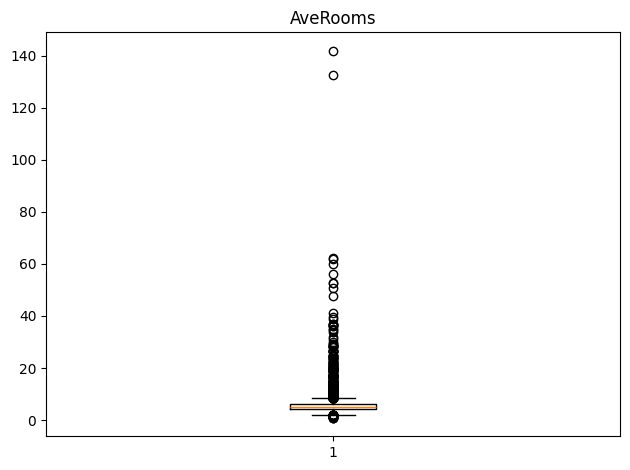

--------AveBedrms--------
Lower Whisker: 0.8660130718954249
Upper Whisker: 1.2395209580838322



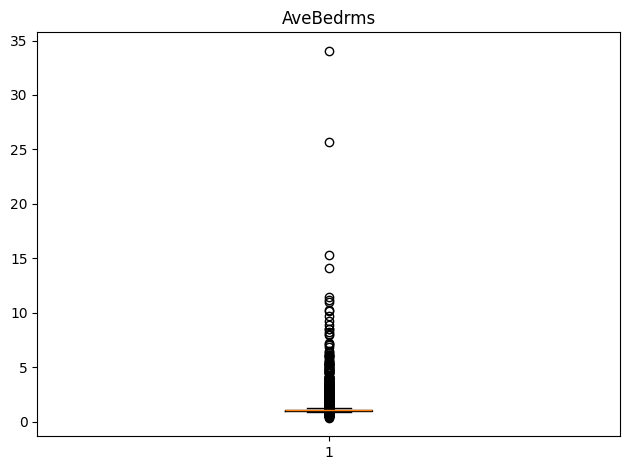

--------AveOccup--------
Lower Whisker: 1.1612903225806452
Upper Whisker: 4.5607476635514015



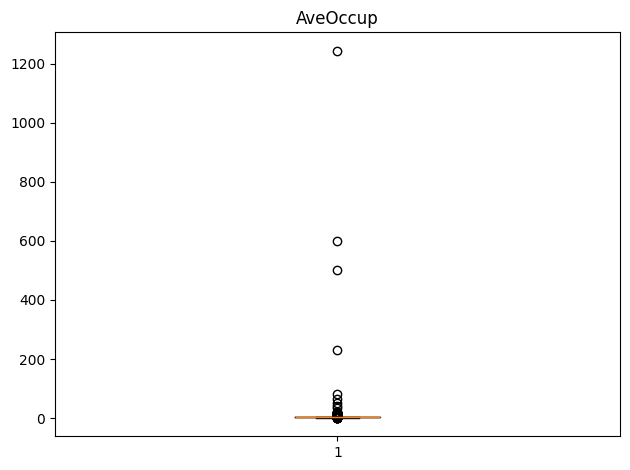

--------Latitude--------
Lower Whisker: 32.54
Upper Whisker: 41.95



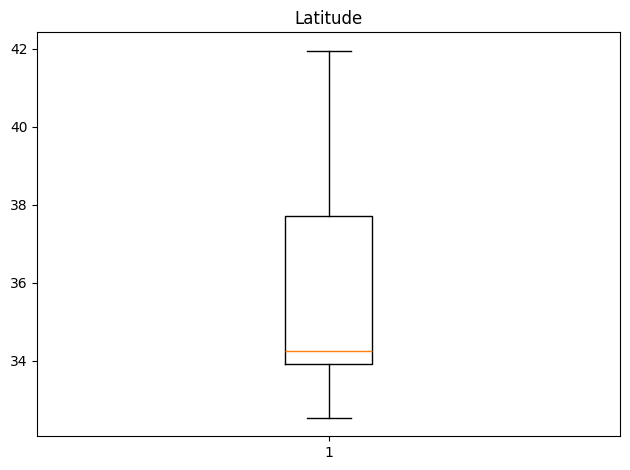

--------Longitude--------
Lower Whisker: -124.35
Upper Whisker: -114.31



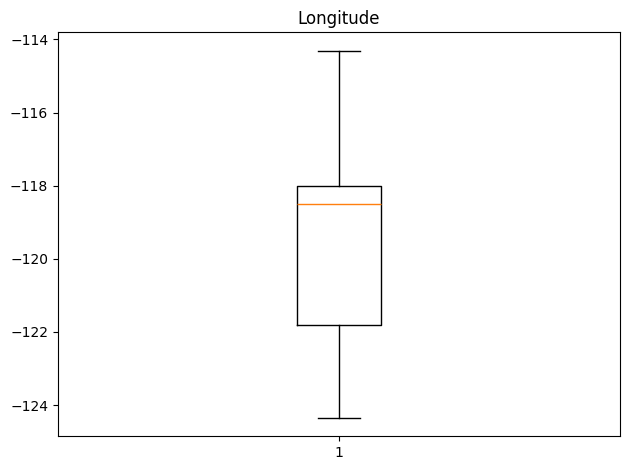

In [77]:
all_whiskers = {}
feature_names_ = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']
for feature in feature_names_:
    all_whiskers[feature] = plot_boxplot(X, feature_name=feature)

In [78]:
all_whiskers

{'MedInc': (0.4999, 8.0113),
 'HouseAge': (1.0, 52.0),
 'AveRooms': (2.0327380952380953, 8.469738030713641),
 'AveBedrms': (0.8660130718954249, 1.2395209580838322),
 'AveOccup': (1.1612903225806452, 4.5607476635514015),
 'Latitude': (32.54, 41.95),
 'Longitude': (-124.35, -114.31)}

In [79]:
# removing outliers
out_feat = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']
X_ = data.frame

df = X_[
    (X_[out_feat[0]] >= all_whiskers[out_feat[0]][0]) & (X_[out_feat[0]] <= all_whiskers[out_feat[0]][1]) &
    (X_[out_feat[1]] >= all_whiskers[out_feat[1]][0]) & (X_[out_feat[1]] <= all_whiskers[out_feat[1]][1]) &
    (X_[out_feat[2]] >= all_whiskers[out_feat[2]][0]) & (X_[out_feat[2]] <= all_whiskers[out_feat[2]][1]) &
    (X_[out_feat[3]] >= all_whiskers[out_feat[3]][0]) & (X_[out_feat[3]] <= all_whiskers[out_feat[3]][1])
    ].reset_index(drop=True)

df.to_csv('../data/data_no_outliers.csv', index=False)

--------MedInc--------
Lower Whisker: 0.536
Upper Whisker: 7.8031



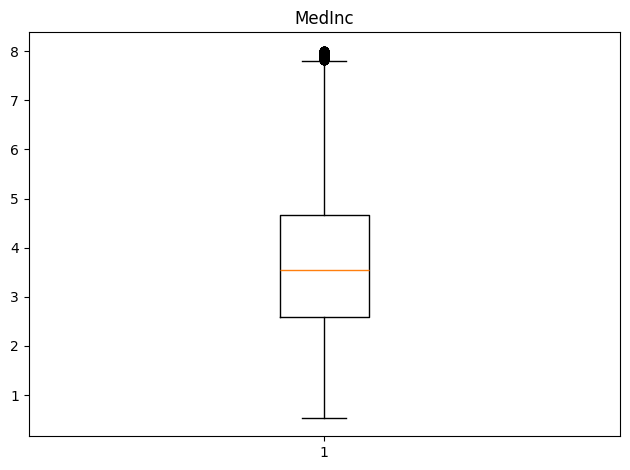

--------HouseAge--------
Lower Whisker: 1.0
Upper Whisker: 52.0



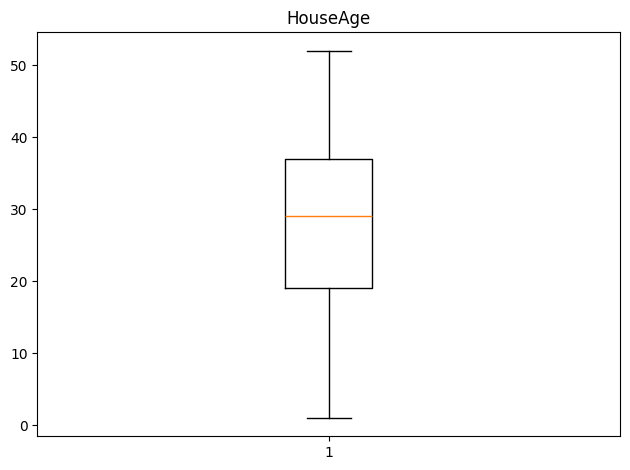

--------AveRooms--------
Lower Whisker: 2.2468694096601074
Upper Whisker: 8.056689342403628



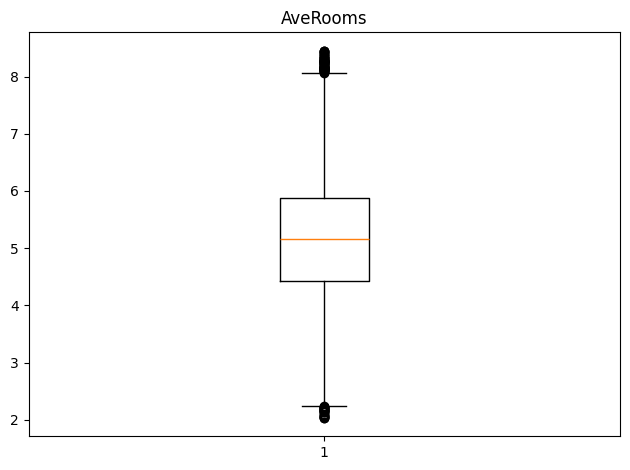

--------AveBedrms--------
Lower Whisker: 0.8786407766990292
Upper Whisker: 1.2159090909090908



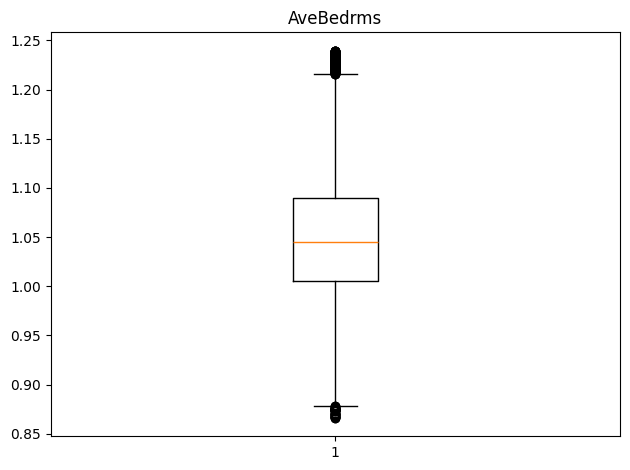

--------AveOccup--------
Lower Whisker: 1.2158730158730158
Upper Whisker: 4.466298342541436



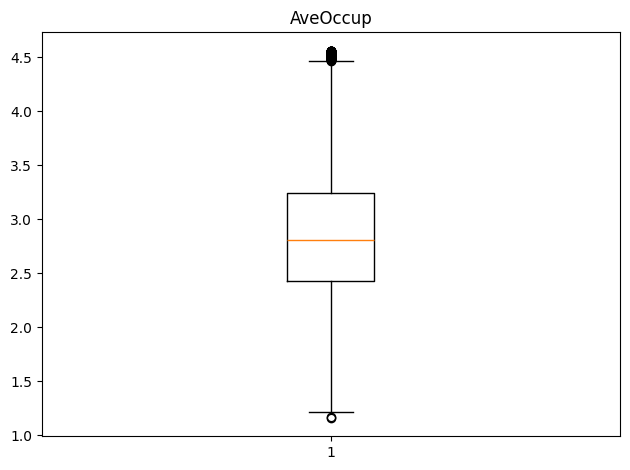

In [80]:
for feature in feature_names_[:-2]:
    plot_boxplot(df, feature_name=feature, return_whiskers=False)

### Histograms without outliers

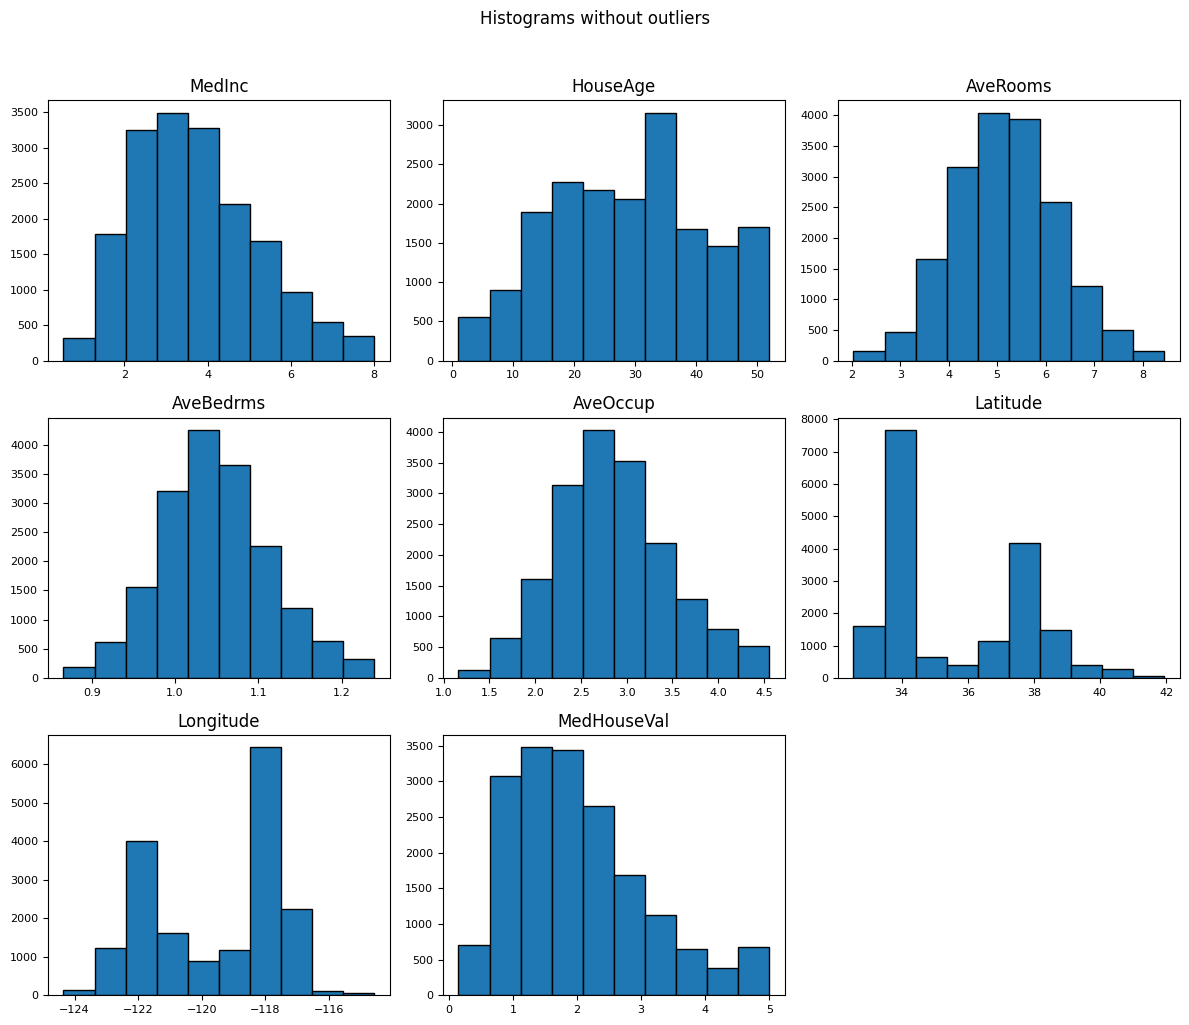

In [81]:
df.drop(columns=['Population'], axis=1).hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms without outliers', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

By addressing the outliers, the distributions of most variables have become more symmetrical and less skewed, allowing for a more accurate depiction of the central tendency and spread of the data. This preprocessing step ensures that the data is more representative and less impacted by extreme values, which can improve the robustness of subsequent modeling and analysis steps.

### Separating, Scaling, Train

In [ ]:
X = df.drop(columns=['MedHouseVal'], axis=1)
y = df['MedHouseVal']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=43)

scaler2 = StandardScaler()

X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [83]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

### Results second linear model: without outliers

In [84]:
pred_test2 = lr2.predict(X_test2)
pred_train2 = lr2.predict(X_train2)

print_results(y_train2, pred_train2, X_train2.shape[0], X_train2.shape[1])
print_results(y_test2, pred_test2, X_test2.shape[0], X_test2.shape[1])

MSE : 0.408
R2 : 0.638
Adjusted R2 : 0.638

MSE : 0.393
R2 : 0.646
Adjusted R2 : 0.646



In [85]:
print(f"Coefficient of the Population feature: {lr2.coef_[list(X.columns).index("Population")]:.3f}")

Coefficient of the Population feature: 0.040


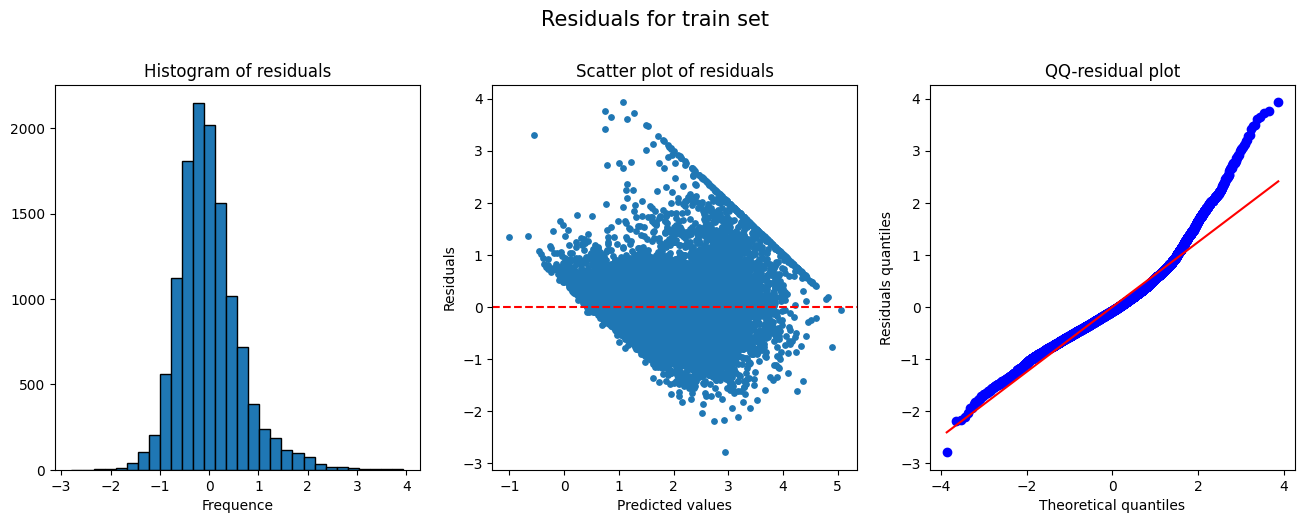

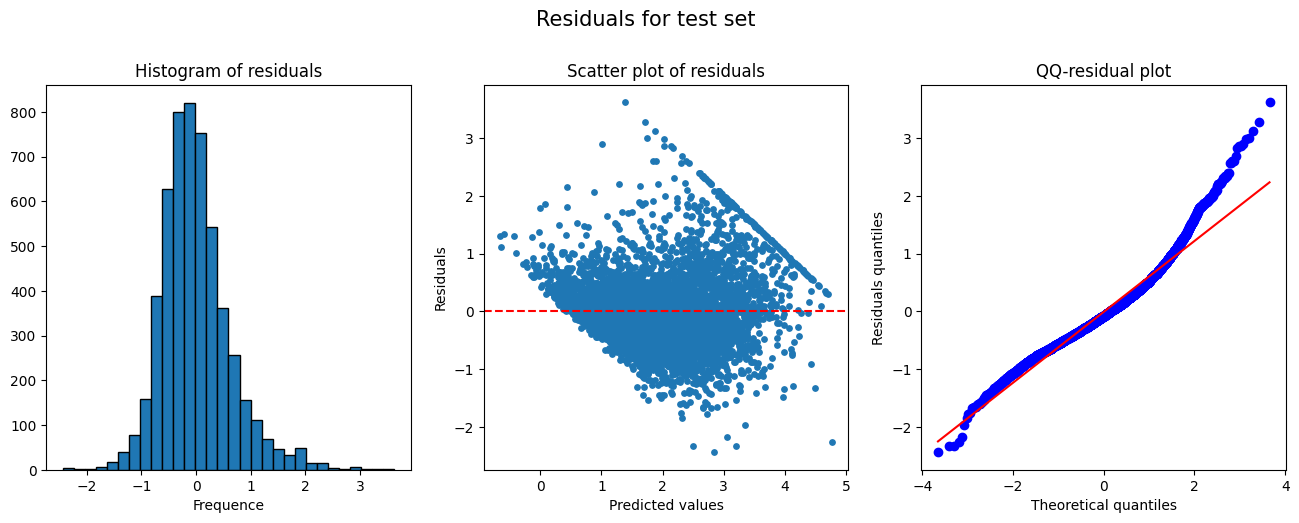

In [86]:
plot_residuals(y_train2, pred_train2, "Residuals for train set")
plot_residuals(y_test2, pred_test2, "Residuals for test set")

- We notice an improvement in the $R^2$ score, and the dispersion of the residuals is closer to a normal distribution. Heteroscedasticity has been reduced, but the model still fails to capture enough of the variance in the data.   
We'll use non-linear algorithms.

### No Outliers, no multicollinearity between `AveRooms` and `AveBedrms`

Referring to the correlation matrix in [eda.ipynb](./1.%20eda.ipynb#1.-EDA), we observe that AveRooms has a stronger positive correlation with the price.   
Therefore, we will retain AveRooms and remove AveBedrms to reduce redundancy and potential multicollinearity.

In [ ]:
X = df.drop(columns=['MedHouseVal', 'AveBedrms'], axis=1)
y = df['MedHouseVal']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=43)

scaler3 = StandardScaler()

X_train3 = scaler3.fit_transform(X_train3)
X_test3 = scaler3.transform(X_test3)

In [88]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)

LinearRegression()

In [89]:
pred_test3 = lr3.predict(X_test3)
pred_train3 = lr3.predict(X_train3)

print_results(y_train3, pred_train3, X_train3.shape[0], X_train3.shape[1])
print_results(y_test3, pred_test3, X_test3.shape[0], X_test3.shape[1])

MSE : 0.420
R2 : 0.627
Adjusted R2 : 0.627

MSE : 0.406
R2 : 0.635
Adjusted R2 : 0.635



In [90]:
print(f"Coefficient of the Population feature: {lr3.coef_[list(X.columns).index("Population")]:.3f}")

Coefficient of the Population feature: 0.054


#### We observe that `Popoulation` feature is still not significant.

#### Create a new feauture from `AveBedrms` and `AveRooms`
`RatioRoomsToBedrms`: which captures the relationship between the average number of rooms and bedrooms while reducing multicollinearity.

In [95]:
X = df.drop(columns=['MedHouseVal', 'Population'], axis=1)
X['RatioRoomsToBedrms'] = X['AveRooms'] / X['AveBedrms']
X = X.drop(columns=['AveRooms', 'AveBedrms'], axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=43)

scaler4 = StandardScaler()

X_train4 = scaler4.fit_transform(X_train4)
X_test4 = scaler4.transform(X_test4)

lr4 = LinearRegression()
lr4.fit(X_train4, y_train4)

LinearRegression()

In [96]:
pred_test4 = lr4.predict(X_test4)
pred_train4 = lr4.predict(X_train4)

print_results(y_train4, pred_train4, X_train4.shape[0], X_train4.shape[1])
print_results(y_test4, pred_test4, X_test4.shape[0], X_test4.shape[1])

MSE : 0.413
R2 : 0.634
Adjusted R2 : 0.633

MSE : 0.399
R2 : 0.641
Adjusted R2 : 0.641



In [ ]:
print(f"Coefficient of the RatioRoomsToBedrms feature: {lr2.coef_[list(X.columns).index("RatioRoomsToBedrms")]:.3f}")

Coefficient of the RatioRoomsToBedrms feature: -0.269


### Results for the regression models (test set)

| Model                              | MSE   | R²    | Adjusted R² |
|------------------------------------|-------|-------|-------------|
| **Simplest model**                 | 0.531 | 0.596 | 0.595       |
| **Model without outliers**         | **0.393** | **0.646** | **0.646**       |
| **Model without outliers + removing 'AveBrms'** | 0.406 | 0.635 | 0.635       |
| **Model without outliers + new feature**       | 0.399 | 0.641 | 0.641       |


### Prediction

In [ ]:
pd.DataFrame({'y_test2': y_test2, 'pred_test2': pred_test2}).head()

,y_test2,pred_test2
5864,2.240,2.338705
15573,2.739,2.539881
7714,2.917,2.620861
2755,0.680,0.628046
14363,2.082,2.649915


### Saving the best linear regression model

In [ ]:
import pickle

pickle.dump(lr2, open('../data/regmodel.pkl', 'wb'))
pickle.dump(scaler2, open('../data/stdscaler.pkl', 'wb'))